# Munging the Titanic Dataset

## Recap of the need

During our exploration of the Titanic data, we found a few problems that need to be solved before the data is ready for analytics.

- About 31% (277 out of 891) of the values in `Age` are missing. Age seemed to play an important role, we need to estimate this in some way.
- While looking at the distributions, we saw that `Fare` seemed to contain extreme values at either end. A few tickets were probably provided free or there may be data entry errors. On the other hand "512" sounds like a very high fare for booking a ticket.
- We should also look at the non-numerical fields like `Ticket` and `Cabin` to see if they contain any useful information.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Note: 'head' is a UNIX command that works on a Mac but may not work on Windows.
# It lets us look at the head of a file that has not yet been read into Python.
# Don't worry if it doesn't work for you.
! head train.csv

'head' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
df = pd.read_csv("train.csv") 

Quick checks:

In [4]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

### Check missing values

`Age` feature has just 714 values that aren't missing. `Cabin` is much worse. 

Let's work on `Cabin` first. A first glance at the variable leaves us with an impression that there are too many NaNs in the dataset. So, let us check the number of nulls / NaNs.

In [7]:
sum(df['Cabin'].isnull())

687

`isnull()` returns 1, if the value is null. 687 is a lot of missing values. We'll drop `Cabin`.

Let's look at `Ticket`

In [8]:
df.Ticket.unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

`Ticket` has a mix of numbers and text and doesn’t seem to contain any information, so will drop `Ticket` as well.

In [9]:
df = df.drop(['Ticket','Cabin'], axis=1)

In [10]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch     Fare Embarked  
0      0   7.2500        S  
1      0  71.2833        C  
2      0   7.9250        S  
3      0  53.1000        S  
4      0   8.0500        S

### How should we handle missing values for `Age`?

There are a lot of possible ways to fill the missing values for `Age`.

One possibility is to drop any missing values. The downside is that we reduce the total number of rows for *all* variables.

In [11]:
temp = df[pd.notnull(df['Age'])]

In [12]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Name           714 non-null object
Sex            714 non-null object
Age            714 non-null float64
SibSp          714 non-null int64
Parch          714 non-null int64
Fare           714 non-null float64
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(3)
memory usage: 61.4+ KB


The other extreme could be to build a supervised learning model to predict a`Age` on the basis of other variables and then use `Age` along with other variables to predict survival.

Another simple strategy is to fill the missing values for `Age` with the mean or median. That preserves all of the information for the other variables.

In [13]:
meanAge = df.Age.mean()
temp = df.copy()
temp.Age = temp.Age.fillna(meanAge)
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


A better way to experiment with imputing missing data is to create a new column for each strategy.

In [14]:
meanAge = df.Age.mean()
df['AgeFillMean'] = df.Age.fillna(meanAge)
df.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch     Fare Embarked  AgeFillMean  
0      0   7.2500        S    22.000000  
1      0  71.2833        C    38.000000  
2      0   7.9250        S    26.000000  
3      0  53.1000        S    35.000000  
4      0   8.0500        S    35.000000  
5      0   8.4583        Q    29.699118  
6      0  51.8625        S    54.000000  
7      1  21.0750        S     2.000000  
8      2  11.1333        S    27.000000  
9      0  30.0708        C    14.000000

In [15]:
medianAge = df.Age.median()
df['AgeFillMedian'] = df.Age.fillna(medianAge)
df.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch     Fare Embarked  AgeFillMean  AgeFillMedian  
0      0   7.2500        S    22.000000           22.0  
1      0  71.2833        C    38.000000           38.0  
2      0   7.9250        S    26.000000           26.0  
3      0  53.1000        S    35.000000           35.0  
4      0   8.0500        S    35.000000           35.0  
5      0   8.4583        Q    29.699118           28.0  
6      0  51.8625        S    54.000000           54.0  
7      1  21.0750        S     2.000000            2.0  
8      2  11.1333        S    27.000000           27.0  
9      0  30.0708        C    14.000000           14.0

### Simple model for missing values for `Age`

Suppose that we want to use the age that was typical in each passenger class and decide that the median might be better. Let's build another reference table to calculate each of these medians ...

In [16]:
import numpy as np
median_ages = np.zeros((2,3))
median_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

... and then populate the array.

First, we'll create a binary variable for Gender. We'll map 'female' to 0 and map 'male' to 1.

In [17]:
df['Gender'] = df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch     Fare Embarked  AgeFillMean  AgeFillMedian  Gender  
0      0   7.2500        S         22.0           22.0       1  
1      0  71.2833        C         38.0           38.0       0  
2      0   7.9250        S         26.0           26.0       0  
3      0  53.1000        S         35.0           35.0       0  
4      0   8.0500        S         35.0           35.0       1

In [18]:
for i in range(0, 2):
    for j in range(0, 3):
        median_ages[i,j] = df[(df['Gender'] == i) & \
                              (df['Pclass'] == j+1)]['Age'].dropna().median()
 
median_ages

array([[35. , 28. , 21.5],
       [40. , 30. , 25. ]])

Again, we'll create a new column for this strategy for imputing missing values

In [19]:
df['AgeFill'] = df['Age']
df.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch     Fare Embarked  AgeFillMean  AgeFillMedian  Gender  AgeFill  
0      0   7.2500        S    22.000000           22.0       1     22.0  
1      0  71.2833        C    38.000000           38.0       0     38.0  
2      0   7.9250        S    26.000000           26.0       0     26.0  
3      0  53.1000        S    35.000000           35.0       0     35.0  
4      0   8.0500        S    35.000000           35.0       1     35.0  
5      0   8.4583        Q    29.699118           28.0       1      NaN  
6      0  51.8625        S    54.000000           54.0       1     54.0  
7      1  21.0750        S     2.000000            2.0       1      2.0  
8      2  11.1333        S    27.000000           27.0       0     27.0  
9      0  30.0708        C    14.000000           14.0       0     14.0

Take a look at just the rows with missing values, and limit it to the columns important to us right now:

In [20]:
df[df['Age'].isnull()][['Gender','Pclass','Age','AgeFill']].head(10)

Gender  Pclass  Age  AgeFill
5        1       3  NaN      NaN
17       1       2  NaN      NaN
19       0       3  NaN      NaN
26       1       3  NaN      NaN
28       0       3  NaN      NaN
29       1       3  NaN      NaN
31       0       1  NaN      NaN
32       0       3  NaN      NaN
36       1       3  NaN      NaN
42       1       3  NaN      NaN

Use some code to fill in `AgeFill` based on our median_ages table. Here we happen to use the alternate syntax for referring to an existing column, like `df.Age` rather than `df['Age']`. 

In [21]:
for i in range(0, 2):
    for j in range(0, 3):
        df.loc[ (df.Age.isnull()) & (df.Gender == i) & (df.Pclass == j+1),\
                'AgeFill'] = median_ages[i,j]

Let's look at the same ten rows we just viewed.

In [22]:
df[ df['Age'].isnull() ][['Gender','Pclass','Age','AgeFill']].head(10)

Gender  Pclass  Age  AgeFill
5        1       3  NaN     25.0
17       1       2  NaN     30.0
19       0       3  NaN     21.5
26       1       3  NaN     25.0
28       0       3  NaN     21.5
29       1       3  NaN     25.0
31       0       1  NaN     35.0
32       0       3  NaN     21.5
36       1       3  NaN     25.0
42       1       3  NaN     25.0

This confirms we accomplished exactly what we wanted.

Let's also create a feature that records whether `Age` was originally missing. This is relatively simple by allowing pandas to use the integer conversion of the True/False evaluation of its built-in function, `pandas.isnull()`.

In [23]:
df['AgeIsNull'] = pd.isnull(df.Age).astype(int)
df.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch     Fare Embarked  AgeFillMean  AgeFillMedian  Gender  AgeFill  \
0      0   7.2500        S    22.000000           22.0       1     22.0   
1      0  71.2833        C    38.000000           38.0       0     38.0   
2      0   7.9250        S    26.000000           26.0       0     26.0   
3      0  53.1000        S    35.000000           35.0       0     35.0   
4      0   8.0500        S    35.000000           35.0       1     35.0   
5      0   8.4583        Q    29.699118           28.0       1     25.0   
6      0  51.8625        S    54.000000           54.0       1     54.0   
7      1  21.0750        S     2.000000            2.0       1      2.0   
8      2  11.1333        S    27.000000           27.0       0     27.0   
9      0  30.0708        C    14.000000           14.0       0     14.0   

   AgeIsNull  
0          0  
1          0  
2          0  
3          0  
4          0  
5          1  
6          0  
7          0  
8          0  
9          0

In [24]:
df[['Survived', 'Pclass', 'Age', 'Fare', 'Gender', 'AgeFill', 'AgeIsNull']].describe()

Survived      Pclass         Age        Fare      Gender     AgeFill  \
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000   
mean     0.383838    2.308642   29.699118   32.204208    0.647587   29.112424   
std      0.486592    0.836071   14.526497   49.693429    0.477990   13.304424   
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.420000   
25%      0.000000    2.000000   20.125000    7.910400    0.000000   21.500000   
50%      0.000000    3.000000   28.000000   14.454200    1.000000   26.000000   
75%      1.000000    3.000000   38.000000   31.000000    1.000000   36.000000   
max      1.000000    3.000000   80.000000  512.329200    1.000000   80.000000   

        AgeIsNull  
count  891.000000  
mean     0.198653  
std      0.399210  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      0.000000  
max      1.000000

Awesome! We now have a dataset that is almost ready for further analytics.

The next step is to drop the columns which we would not use:

In [25]:
df = df.drop(['Name', 'Sex', 'Embarked'], axis=1)

We can also drop `Age`, since we copied and filled that to a better column `AgeFill`. The original `Age` still has the missing values which won't work well in our future model.

In [26]:
df = df.drop(['Age'], axis=1)

An alternate way is to drop any rows which still have missing values:

In [27]:
df = df.dropna()

In [28]:
df.head(10)

PassengerId  Survived  Pclass  SibSp  Parch     Fare  AgeFillMean  \
0            1         0       3      1      0   7.2500    22.000000   
1            2         1       1      1      0  71.2833    38.000000   
2            3         1       3      0      0   7.9250    26.000000   
3            4         1       1      1      0  53.1000    35.000000   
4            5         0       3      0      0   8.0500    35.000000   
5            6         0       3      0      0   8.4583    29.699118   
6            7         0       1      0      0  51.8625    54.000000   
7            8         0       3      3      1  21.0750     2.000000   
8            9         1       3      0      2  11.1333    27.000000   
9           10         1       2      1      0  30.0708    14.000000   

   AgeFillMedian  Gender  AgeFill  AgeIsNull  
0           22.0       1     22.0          0  
1           38.0       0     38.0          0  
2           26.0       0     26.0          0  
3           35.0       0     35.0          0  
4           35.0       1     35.0          0  
5           28.0       1     25.0          1  
6           54.0       1     54.0          0  
7            2.0       1      2.0          0  
8           27.0       0     27.0          0  
9           14.0       0     14.0          0

### ... about those questionable values of `Fare` ...

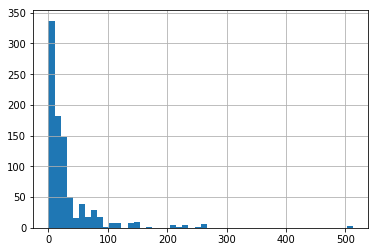

In [29]:
df.Fare.hist(bins = 50);

Let's replace the unusually high fare with the median.

In [30]:
#ignore the warning here
df.Fare[df.Fare > 300] = df.Fare.median()

C:\Users\santacrw\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


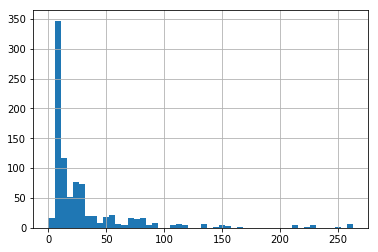

In [31]:
df.Fare.hist(bins = 50);

The minimum fare is zero. Let's see if those might all be babies.

In [32]:
df[['AgeFill','Fare']][df.Fare<5]

AgeFill    Fare
179     36.0  0.0000
263     40.0  0.0000
271     25.0  0.0000
277     30.0  0.0000
302     19.0  0.0000
378     20.0  4.0125
413     30.0  0.0000
466     30.0  0.0000
481     30.0  0.0000
597     49.0  0.0000
633     40.0  0.0000
674     30.0  0.0000
732     30.0  0.0000
806     39.0  0.0000
815     40.0  0.0000
822     38.0  0.0000

Notice that there is a jump from a fare of 0 to 4, so there is something going on here. Most likely, these are errors, so let’s replace them by the median fare for their class, and do the same for null values.

First we set those fares of 0 to NaN:

In [33]:
# lambda just means a function we create on the fly
df.Fare = df.Fare.map(lambda x: np.nan if x==0 else x)

Calculate class medians

In [54]:
class_medians = df.pivot_table('Fare', index='Pclass', aggfunc='median')
class_medians

Fare
Pclass         
1       59.4000
2       15.0229
3        8.0500

Now try to write some code that replaces the NaN fare values with the class_medians.

In [71]:
df['FareFill'] = df['Fare']
df[df['Fare'].isnull()][['Pclass','Fare','FareFill']].head()


Pclass  Fare  FareFill
179       3   NaN       NaN
263       1   NaN       NaN
271       3   NaN       NaN
277       2   NaN       NaN
302       3   NaN       NaN

In [272]:

a=class_medians.query('Pclass')

import numpy as np
b=np.asarray(a)

for i in range(0, 3):
    for j in range(0, 1):
        df.loc[ (df.Fare.isnull()) & (df.Pclass == i+1),\
                'FareFill'] = b[i,j]
df[df['Fare'].isnull()][['Pclass','Fare','FareFill']].head()

Pclass  Fare  FareFill
179       3   NaN    8.0500
263       1   NaN   59.4000
271       3   NaN    8.0500
277       2   NaN   15.0229
302       3   NaN    8.0500

In [278]:

df['FareFill'].isnull().values.sum()

0

## **Now** we have a clean and tidy dataset that is ready for analytics!

In [279]:
df.describe()

PassengerId    Survived      Pclass       SibSp       Parch  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642    0.523008    0.381594   
std     257.353842    0.486592    0.836071    1.102743    0.806057   
min       1.000000    0.000000    1.000000    0.000000    0.000000   
25%     223.500000    0.000000    2.000000    0.000000    0.000000   
50%     446.000000    0.000000    3.000000    0.000000    0.000000   
75%     668.500000    1.000000    3.000000    1.000000    0.000000   
max     891.000000    1.000000    3.000000    8.000000    6.000000   

             Fare  AgeFillMean  AgeFillMedian      Gender     AgeFill  \
count  876.000000   891.000000     891.000000  891.000000  891.000000   
mean    31.050599    29.699118      29.361582    0.647587   29.112424   
std     41.272080    13.002015      13.019697    0.477990   13.304424   
min      4.012500     0.420000       0.420000    0.000000    0.420000   
25%      7.925000    22.000000      22.000000    0.000000   21.500000   
50%     14.479150    29.699118      28.000000    1.000000   26.000000   
75%     31.068750    35.000000      35.000000    1.000000   36.000000   
max    263.000000    80.000000      80.000000    1.000000   80.000000   

        AgeIsNull    FareFill  
count  891.000000  891.000000  
mean     0.198653   30.998498  
std      0.399210   41.028011  
min      0.000000    4.012500  
25%      0.000000    7.925000  
50%      0.000000   14.500000  
75%      0.000000   31.275000  
max      1.000000  263.000000